# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

From an employer's perspective, if the firm employes a person for a particular position it has to offer a package whcih best suits the position in that location. It is most of the times extremely higher or lower than what is actual. So, this project intends to provie a model which can predict the salary provided the company, location, position and a few other inforamtion using which the company will be able to offer a salary with a known variablity.
From an employee's perspective, he/she can choose a company based on their qualification and salary expectations or decide their career based on the it.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #model_1
from sklearn.tree import DecisionTreeRegressor #model_2
from sklearn.ensemble import RandomForestRegressor #model_3
from sklearn.ensemble import AdaBoostRegressor #model_4
from sklearn.ensemble import GradientBoostingRegressor #model_5
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pickle


#your info here
__author__ = 'Aiyngaran Chockalingam'
__email__ = 'aiyngara@buffalo.edu'

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
def load_df(path):
    return pd.read_csv(path)

In [3]:
train_features_df = load_df('C:/Users/aiyng/Desktop/data/train_features.csv')
train_salaries_df = load_df('C:/Users/aiyng/Desktop/data/train_salaries.csv')
test_features_df = load_df('C:/Users/aiyng/Desktop/data/test_features.csv')

### ---- 3 Explore the data (EDA) ----

In [4]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [5]:
train_salaries_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [6]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [7]:
train_features_df.shape

(1000000, 8)

In [8]:
train_salaries_df.shape

(1000000, 2)

In [9]:
test_features_df.shape

(1000000, 8)

### Checking for the data type and counts of each Feature

In [10]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


This tells the data types of each feature. There are no missing values as every entry is a non-null entry.

In [11]:
train_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


There are no missing entities in the response as well.

In [12]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Checking for the duplicates

In [13]:
train_features_df.duplicated().sum()

0

In [14]:
train_salaries_df.duplicated().sum()

0

In [15]:
test_features_df.duplicated().sum()

0

In [16]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

### Separating Categorical and Numerical Columns

In [17]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

In [18]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

### Basic Description of the Quantitative Features

In [19]:
train_features_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


### Basic Description of the Categorical Features

In [20]:
train_features_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685368535,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merging Features and Response

In [21]:
train_df_eda = pd.merge(train_features_df, train_salaries_df, on = 'jobId', how = 'left')

### Visual examination of the response variable

C:\Users\aiyng\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


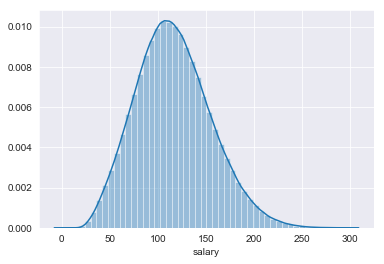

In [22]:
#Checking the Distribution of the response variable(Salary)
sns.set_style('darkgrid')
sns.distplot(train_df_eda.salary)

The Distribution seems to be slightly right skewed, might have some possible outliers. There are also some values around 0 salary.

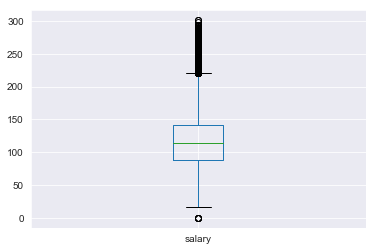

In [23]:
#Box plot to check outliers
train_df_eda.boxplot(column = 'salary')

There seems to be outliers on bot the sides of the plot and there are more outliers above the upper limit of the whiskers plot than below the lower limit of the whiskers plot

In [24]:
stat = train_df_eda.salary.describe()
IQR = stat['75%'] - stat['25%']
upper_limit = stat['75%'] + 1.5 * IQR
lower_limit = stat['25%'] - 1.5 * IQR
print('The upper limit is ', upper_limit)
print('The lower limit is ', lower_limit)

The upper limit is  220.5
The lower limit is  8.5


In [25]:
 train_df_eda[train_df_eda['salary'] <= lower_limit]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


The salaries with 0 values does not seem like actual entries, they should be missing values and these potential outliers have to be removed

In [26]:
train_df_eda[train_df_eda['salary'] >= upper_limit].head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


The higher values in salary are ought to the job type or the degree or the industry. So they are not the outliers and are retained for the analysis but the job type JUNIOR has to be examined

In [27]:
train_df_eda[(train_df_eda['salary'] >= upper_limit) & (train_df_eda['jobType'] == 'JUNIOR')].head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


The JUNIOR role is being paid more in industries like oil and finance which is reasonable

In [28]:
#Removing the data points with zero salaries:
train_df_eda = train_df_eda[train_df_eda['salary'] > lower_limit]

In [29]:
unique_values = {}
for col in categorical_cols:
    unique_values[col] = len(train_df_eda[col].unique())
print(unique_values)

{'jobId': 999995, 'companyId': 63, 'jobType': 8, 'degree': 5, 'major': 9, 'industry': 7}


### Visual examination of the features

In [30]:
def plot_numeric(df, col):
    df.plot(kind = 'scatter', x = col, y = 'salary', alpha = 0.1)

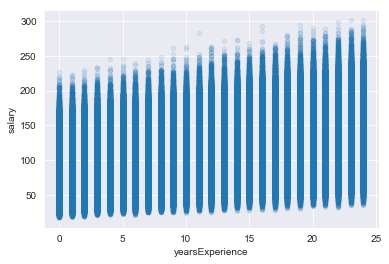

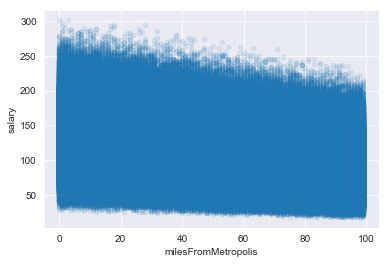

In [31]:
for column in ['yearsExperience', 'milesFromMetropolis']:
    plot_numeric(train_df_eda, column)

As years of experience increases, the salary tends to increase and the as the mile from metropolis increases, the salary tends to decrease.

In [32]:
def plot_features(df, col):
    plt.figure(figsize = (14,6))

    if df[col].dtype == 'int64':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        plt.fill_between(range(len(std)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
        mean.plot()
    elif col == 'companyId':
        df[col] = df[col].astype('category')
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        plt.fill_between(range(len(std)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
        mean.plot()
    else:
        median = df.groupby(col)['salary'].median()
        df[col] = df[col].astype('category')
        levels = median.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace = True)
        sns.boxplot(x = col, y = 'salary', data = df)
    plt.xticks(rotation = 45)
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()

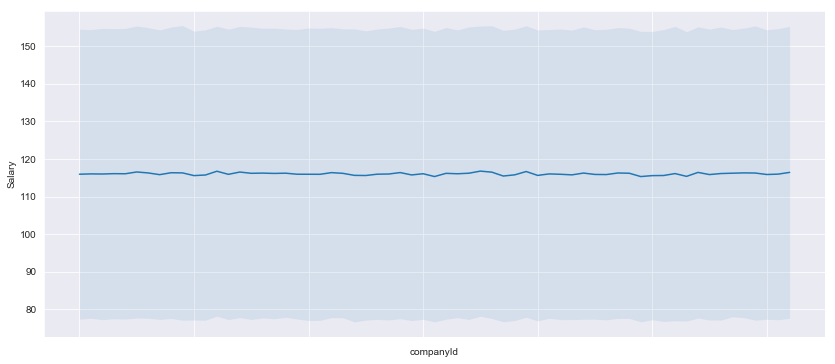

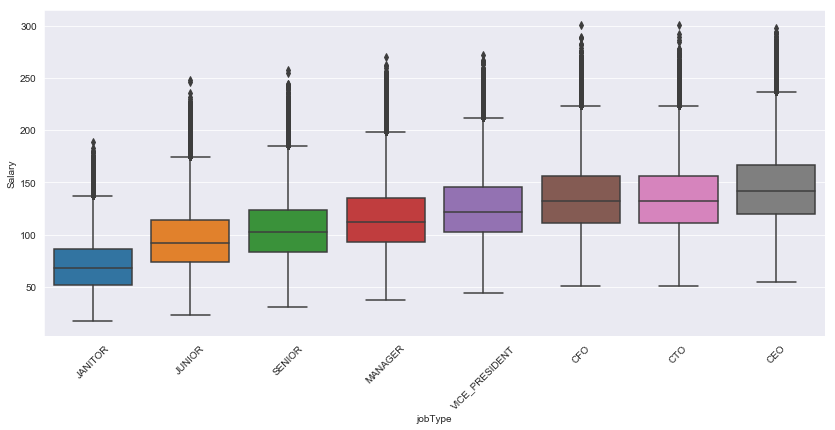

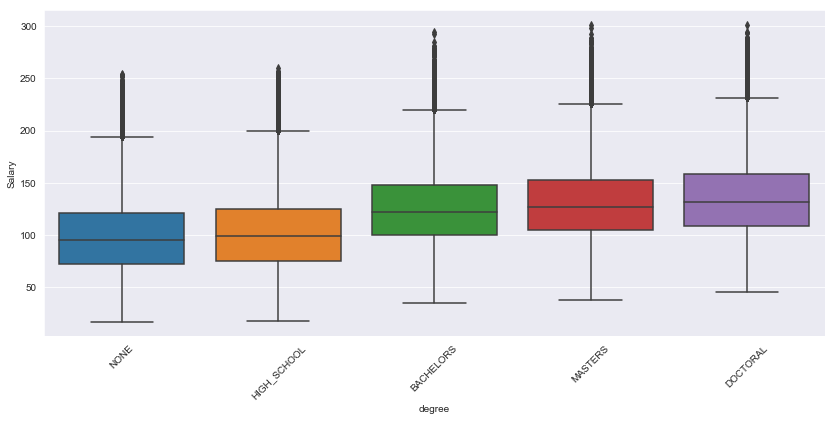

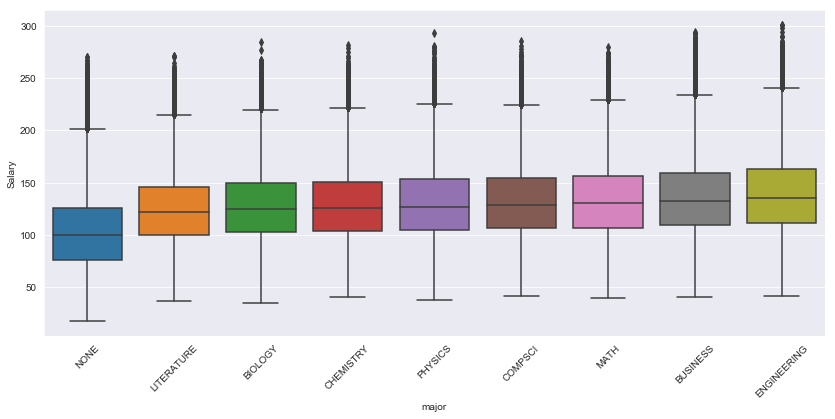

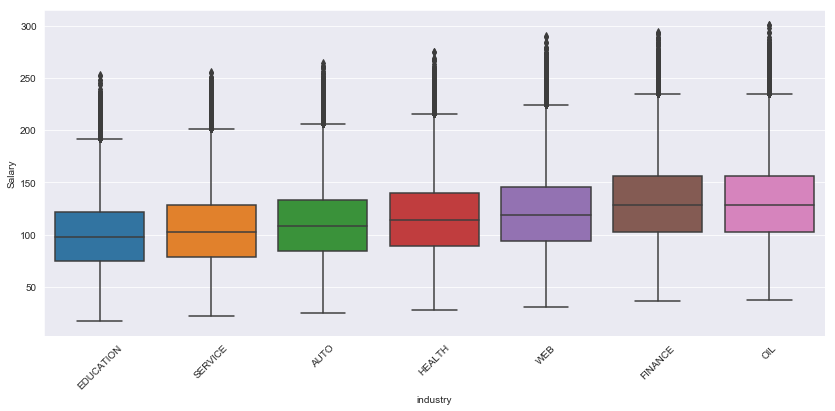

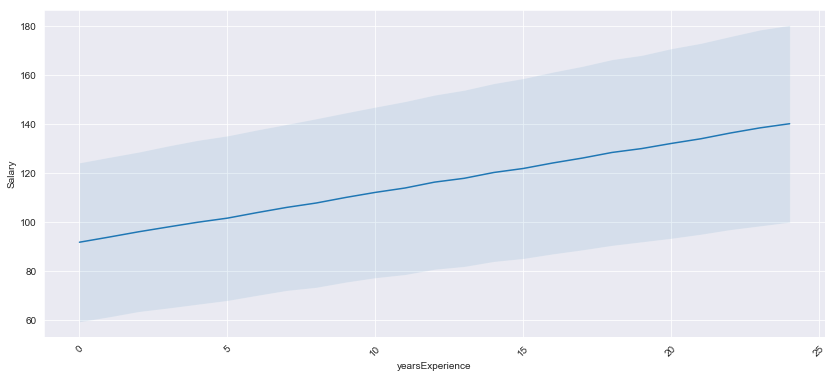

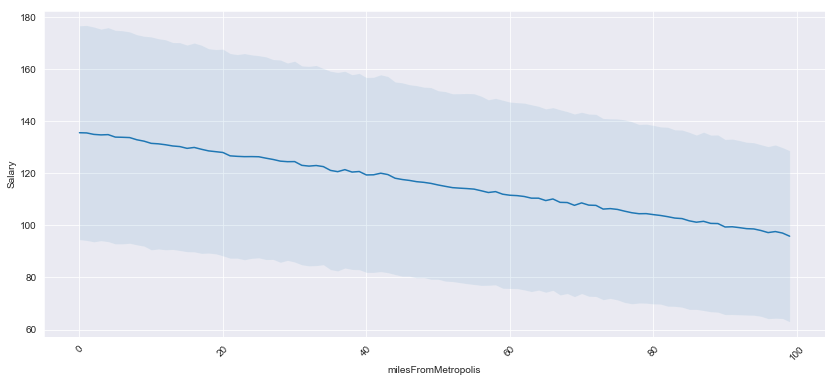

In [33]:
for col in ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']:
    plot_features(train_df_eda, col)

From the plot for company ID and Salary it is clear that companyID doesnt have any particular linear relationship with the salary on itself.
The job type, degree, industry and years experience has a significant positive linear relationship with salary and miles from metropolis has a clear negative linear relationship with salary.
The major seems to have some kind of relationship with salary but not very significant.

### Converting categorical variables to numerical to check correlation

In [34]:
def encode_labels(df, col):
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df_eda[train_df_eda[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [35]:
for col in train_df_eda.columns:
    if train_df_eda[col].dtype.name == 'category':
        encode_labels(train_df_eda, col)

In [36]:
train_df_eda.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


Every categorical variable has been converted into numerical variable by taking salary mean for the respective category.

### Correlation

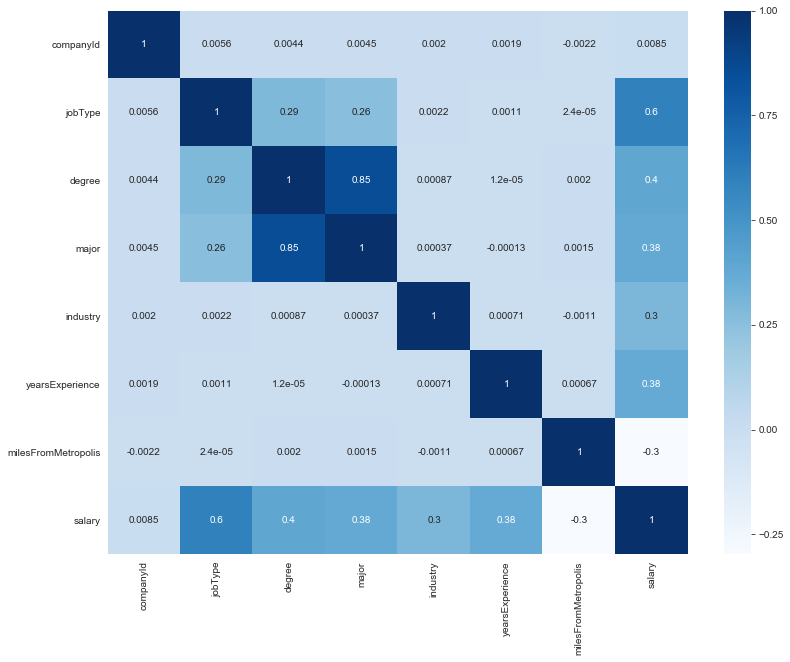

In [37]:
plt.figure(figsize = (13,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary']
correlation = train_df_eda[features].corr()
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.xticks(rotation = 90)
plt.show()

From the correlation plot it can be seen that there are correlations between the target variable (salary) and every other except for the companyID. There are also some inter relations between the features like major, degree, and job type.

## Defining the required function to reuse

In [38]:
def combine_df(df1, df2):
    return pd.concat([df1, df2], axis = 1, sort = False)

def clean_df(df):
    clean_1 = df.drop('jobId', axis = 1)
    if 'salary' in df.columns:
        clean_2 = clean_1[clean_1['salary'] > 0]
        return clean_2
    else:
        return clean_1

def one_hot_encode(df):
    return pd.get_dummies(df)

def get_features(df, target):
    return df.loc[:, df.columns != target]

def get_target(df, target):
    return df[target]

def train_model(features, target, model_object):
    model_scores = cross_val_score(model_object, features, target, scoring = 'neg_mean_squared_error', cv = 5)
    mse = -model_scores.mean()
    return (mse)

def save_model(model, feature_importance, predictions):
    pickle.dump(model, open('final_model_salary_prediction', 'wb'))
    feature_importance.to_csv('Salary_prediction_feature_importance.csv')
    np.savetxt('Salary_predictions.csv', predictions, delimiter = ',')

- combine_df function combines the two dataframes, here it is hte features and the target.
- clean_df function initially drops the jobID column as is does not make sense to have it for prediction and then it drops all the rows where the salary is equal to 0 as we havw some salaries equal to zero.
- one_hot_encode function converts all the columns with categorical variables into separate individual columns.
- get_features function extracts all the features from the combined dataframe.
- get_target function extracts the target variable from the combined dataframe.
- train_model function trains the model specified.
- save_model function saves the model, feature importance and the predictions for deployment

### ---- 4 Clean the data ----

In [39]:
train_df = combine_df(train_features_df, train_salaries_df)

train_df = clean_df(train_df)

train_df = one_hot_encode(train_df)

salary_features = get_features(train_df, 'salary')

salary_labels = get_target(train_df, 'salary')

The features and target data are initially combined into a single dataframe and cleaned. the features are encoded into numerical values by converting each individual category into a separate column. Then train features and target variables are stord in separate names for modelling purpose.

In this step the features and target are suposed to be separated into test and train set but, we have another set to test the trained model so we skip this step for this project.

### ---- 5 Establish a baseline ----

In [40]:
#Overall average salary:
model_1 = salary_labels.mean()
base_model_1_mse = sum((salary_labels - model_1)**2)/salary_labels.count()

#Average salary for each Industry:
model_2 = train_df_eda["industry"]
base_model_2_mse = sum((salary_labels - model_2)**2)/salary_labels.count()

The first model is a mere average of all the salaries and the second model is the average salaries within a particular industry. These two models are set as base models to compare with other machince learning models.

Mean Squared error is choosen as the metric to evaluate the moddel efficiency as it tells the variance from the mean and it is a regression problem.

### ---- 6 Hypothesize solution ----

#### Simpler models to explain the results (From an employee's perspective - Factors influencing is more important)
- Linear Regression (As there are a linear relations between the feartues and the target variable)
- Decision Tree

#### Complex models to attain better results (From an employer's perspective - Accuracy is more important)
- Random Forest
- Adaptive Boosting
- Gradient Boosting Method

## Part 3 - DEVELOP

### ---- 7 Create models ----

In [41]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(max_depth = 20)
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, max_depth = 30, min_samples_split = 60,
                          max_features = 20, verbose = 5, random_state = 42, bootstrap=True)
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state = 42)
gbm = GradientBoostingRegressor(n_estimators=150, min_samples_split = 200, max_features = 40,
                                max_depth = 8,learning_rate = 0.1, random_state = 42)

In [42]:
models = [lin_reg, tree_reg, rf, ada, gbm]

### ---- 8 Test models ----

In [43]:
#Testing the models individually.
'''
lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, salary_features, salary_labels, scoring = 'neg_mean_squared_error', cv = 5)
-lin_scores.mean() #384.44380106737896

tree_reg = DecisionTreeRegressor(max_depth = 20)
tree_scores = cross_val_score(tree_reg, salary_features, salary_labels, scoring = 'neg_mean_squared_error', cv = 5)
-tree_scores.mean() #439.154634911917

rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, max_depth = 30, min_samples_split = 60,
                          max_features = 20, verbose = 5, random_state = 42, bootstrap=True)
forest_score = cross_val_score(rf, salary_features, salary_labels, scoring = 'neg_mean_squared_error', cv = 5)
-forest_score.mean() #366.7746192465264

ada = AdaBoostRegressor(n_estimators=50, learning_rate=1, random_state = 42)
ada_score = cross_val_score(ada, salary_features, salary_labels, scoring = 'neg_mean_squared_error', cv = 5)
-ada_score.mean() #662.5025360977235

gbm = GradientBoostingRegressor(n_estimators=150, min_samples_split = 200, max_features = 40,
                                max_depth = 8,learning_rate = 0.1, random_state = 42)
gbm_score = cross_val_score(gbm, salary_features, salary_labels, scoring = 'neg_mean_squared_error', cv = 5)
-gbm_score.mean() #357.50969161921154
'''

#Tuning the hyper parameters to get best results.
'''
param_grid = {'bootstrap' : [True, False], 'n_estimators' : [50, 100, 200], 'max_depth' : [10, 20, 30, 40, 50],
               'max_features' : [12, 13, 14, 40], 'min_samples_split' : [50, 100, 200, 300]}
forest_reg = RandomForestRegressor(random_state = 42)
random_search = RandomizedSearchCV(estimator = forest_reg, param_distributions = param_grid, n_iter = 25, cv = 5, 
                                   verbose=2, random_state=42, n_jobs = -1)
random_search.fit(salary_features, salary_labels)
random_search.best_params_

ada_boost_reg = AdaBoostingRegressor(random_state = 42)
param_ada = {'n_estimators': [50, 100, 150, 200], 'learning_rate' : [0.05, 0.1, 0.3, 1], 'loss' : ['linear', 'square', 'exponential']}
random_search_ada = RandomizedSearchCV(ada_boost_reg, param_ada, cv=5, n_iter=10, n_jobs=-1, random_state=42)
random_search_ada.fit(salary_features, salary_labels)
random_search_ada.best_params_

gbm_boost_reg = GradientBoostingRegressor(random_state = 42)
param_gbm = {'n_estimators': [50, 100, 150, 200], 'learning_rate' : [0.05,0.1,0.3], 
              'min_samples_split' : [50, 100, 200, 300], 'max_depth' : [5, 8],
              'max_features' : [12, 13, 14, 40]}
random_search_gbm = RandomizedSearchCV(gbm_boost_reg, param_gbm, cv=5,n_iter=10, n_jobs=-1, random_state=42)
random_search_gbm.fit(salary_features, salary_labels)
random_search_gbm.best_params_
'''

"\nparam_grid = {'bootstrap' : [True, False], 'n_estimators' : [50, 100, 200], 'max_depth' : [10, 20, 30, 40, 50],\n               'max_features' : [12, 13, 14, 40], 'min_samples_split' : [50, 100, 200, 300]}\nforest_reg = RandomForestRegressor(random_state = 42)\nrandom_search = RandomizedSearchCV(estimator = forest_reg, param_distributions = param_grid, n_iter = 25, cv = 5, \n                                   verbose=2, random_state=42, n_jobs = -1)\nrandom_search.fit(salary_features, salary_labels)\nrandom_search.best_params_\n\nada_boost_reg = AdaBoostingRegressor(random_state = 42)\nparam_ada = {'n_estimators': [50, 100, 150, 200], 'learning_rate' : [0.05, 0.1, 0.3, 1], 'loss' : ['linear', 'square', 'exponential']}\nrandom_search_ada = RandomizedSearchCV(ada_boost_reg, param_ada, cv=5, n_iter=10, n_jobs=-1, random_state=42)\nrandom_search_ada.fit(salary_features, salary_labels)\nrandom_search_ada.best_params_\n\ngbm_boost_reg = GradientBoostingRegressor(random_state = 42)\nparam_

In [44]:
model_dict = {}
model_dict["base_model_1_mse"] = base_model_1_mse
model_dict["base_model_2_mse"] = base_model_2_mse

#Models
for model in models:
    print('Running : ' + type(model).__name__)
    model_dict[type(model).__name__] = train_model(salary_features, salary_labels, model)

print('Model summary')
model_summary = pd.DataFrame(list(model_dict.items()), columns=['Model', 'Mean squared error'])
model_summary = model_summary.sort_values(by ='Mean squared error' )
print(model_summary)

Running : LinearRegression
Running : DecisionTreeRegressor
Running : RandomForestRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | e

Running : AdaBoostRegressor
Running : GradientBoostingRegressor
Model summary
                       Model  Mean squared error
6  GradientBoostingRegressor          357.509692
4      RandomForestRegressor          366.774619
2           LinearRegression          384.443801
3      DecisionTreeRegressor          439.186277
5          AdaBoostRegressor          750.303513
1           base_model_2_mse         1367.122951
0           base_model_1_mse         1499.017242


### ---- 9 Select best model  ----

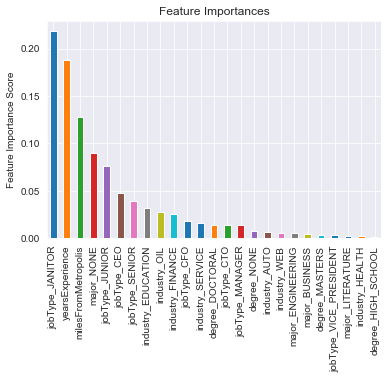

In [45]:
test_df = clean_df(test_features_df)

test_df = one_hot_encode(test_df)

best = min(model_dict, key=model_dict.get)

models_dict = {}
for model in models:
    models_dict[type(model).__name__] = model
    
best_model = models_dict[best]

best_model.fit(salary_features, salary_labels)

predictions = best_model.predict(test_df)

feature_imp = []

if hasattr(best_model, 'feature_importances_'):
    feature_imp.append(pd.Series(best_model.feature_importances_, salary_features.columns).sort_values(ascending=False))
    feat_importance = pd.Series(best_model.feature_importances_, salary_features.columns).sort_values(ascending=False)[0:25]
    feat_importance.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

feature_importance = feature_imp[0]

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

Cleaning train Data
Loading constructors
Training models
Running : LinearRegression
Running : DecisionTreeRegressor
Running : RandomForestRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | e

Running : AdaBoostRegressor
Running : GradientBoostingRegressor
Model summary
                       Model  Mean squared error
6  GradientBoostingRegressor          357.509692
4      RandomForestRegressor          366.774619
2           LinearRegression          384.443801
3      DecisionTreeRegressor          439.390947
5          AdaBoostRegressor          750.303513
1           base_model_2_mse         1367.122951
0           base_model_1_mse         1499.017242
Best model
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8, max_features=40,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=200, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=

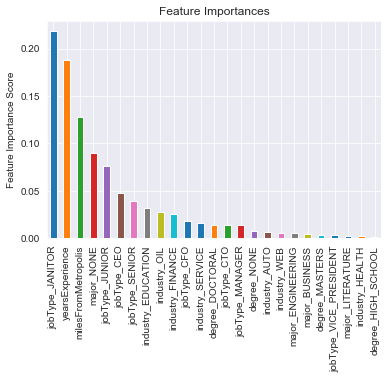

In [47]:
def combine_df(df1, df2):
    return pd.concat([df1, df2], axis = 1, sort = False)

def clean_df(df):
    clean_1 = df.drop("jobId", axis = 1)
    if "salary" in df.columns:
        clean_2 = clean_1[clean_1["salary"] > 0]
        return clean_2
    else:
        return clean_1

def one_hot_encode(df):
    return pd.get_dummies(df)

def get_features(df, target):
    return df.loc[:, df.columns != target]

def get_target(df, target):
    return df[target]

def train_model(features, target, model_object):
    model_scores = cross_val_score(model_object, features, target, scoring = 'neg_mean_squared_error', cv = 5)
    mse = -model_scores.mean()
    return (mse)

def save_model(model, feature_importance, predictions):
    pickle.dump(model, open('final_model_salary_prediction', 'wb'))
    feature_importance.to_csv('Salary_prediction_feature_importance.csv')
    np.savetxt('Salary_predictions.csv', predictions, delimiter = ',')

if __name__ == '__main__':
    print("Cleaning train Data")
    train_df = combine_df(train_features_df, train_salaries_df)
    train_df = clean_df(train_df)
    train_df = one_hot_encode(train_df)
    
    salary_features = get_features(train_df, 'salary')
    salary_labels = get_target(train_df, 'salary')
    
    print("Loading constructors")
    lin_reg = LinearRegression()
    tree_reg = DecisionTreeRegressor(max_depth = 20)
    rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, max_depth = 30, min_samples_split = 60,
                          max_features = 20, verbose = 5, random_state = 42, bootstrap=True)
    ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state = 42)
    gbm = GradientBoostingRegressor(n_estimators=150, min_samples_split = 200, max_features = 40,
                                max_depth = 8,learning_rate = 0.1, random_state = 42)
    
    models = [lin_reg, tree_reg, rf, ada, gbm]
    
    print("Training models")
    #Base model 1
    model_1 = salary_labels.mean()
    base_model_1_mse = sum((salary_labels - model_1)**2)/salary_labels.count()

    #base model 2
    #Average salary for each Industry:
    model_2 = train_df_eda["industry"]
    base_model_2_mse = sum((salary_labels - model_2)**2)/salary_labels.count()
    
    model_dict = {}
    model_dict["base_model_1_mse"] = base_model_1_mse
    model_dict["base_model_2_mse"] = base_model_2_mse
    
    #Models
    for model in models:
        print("Running : " + type(model).__name__)
        model_dict[type(model).__name__] = train_model(salary_features, salary_labels, model)
    
    model_summary = pd.DataFrame(list(model_dict.items()), columns=['Model', 'Mean squared error'])
    model_summary = model_summary.sort_values(by ='Mean squared error' )
    print("Model summary")
    print(model_summary)
    
    best = min(model_dict, key=model_dict.get)
    models_dict = {}
    for model in models:
        models_dict[type(model).__name__] = model
    best_model = models_dict[best]
    print("Best model")
    print(best_model)
    
    print("Cleaning test data")
    test_df = clean_df(test_features_df)
    test_df = one_hot_encode(test_df)
    
    print("Fitting the model on test data set")
    best_model.fit(salary_features, salary_labels)
    
    predictions = best_model.predict(test_df)
    print("Prediction is complete")
    
    if hasattr(best_model, 'feature_importances_'):
        feat_importance = pd.Series(best_model.feature_importances_, salary_features.columns).sort_values(ascending=False)[0:25]
        feat_importance.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    
    feature_importance = feature_imp[0]
    
    print("Saving model and predictions")
    save_model(best_model, feature_importance, predictions)

### ---- 12 Deploy solution ----

In [48]:
#Saving model
save_model(best_model, feature_importance, predictions)